In [4]:
import numpy as np
import os
import pandas as pd
import re

In [3]:
!pip install pandas

  Using cached pytz-2021.1-py2.py3-none-any.whl (510 kB)


In [5]:
data_dir = r'Data/'

In [6]:
file = np.loadtxt(fname=data_dir+'nertrnweather.txt',encoding='utf-8',dtype=str)
file

array([['अरे', 'O'],
       ['सारथी', 'O'],
       ['जम्मू', 'U-location'],
       ...,
       ['क्या', 'O'],
       ['है', 'O'],
       ['?', 'O']], dtype='<U14')

In [7]:
# df=pd.DataFrame(file,columns=['Word','Tag'])

In [8]:
# df.insert(loc=0,column='Sentence #',value='NaN')

In [9]:
df = pd.DataFrame(columns=['Sentence #','Word','Tag'])
# df.append({"Word":"Hello","Tag":"O"},ignore_index=True)

In [10]:
i=1
data = list()
with open(data_dir+'nertrnweather.txt',encoding='utf-8') as f:
    for line in f.readlines():
        if line=='\n':
            i+=1
        else:
            data=line.split(" ")
            df=df.append({"Sentence #":f"Sentence {i}","Word":data[0],"Tag":re.sub("\n","",data[1])},ignore_index=True)
df

,Sentence #,Word,Tag
0,Sentence 1,अरे,O
1,Sentence 1,सारथी,O
2,Sentence 1,जम्मू,U-location
3,Sentence 1,कैसा,O
4,Sentence 1,मौसम,O
...,...,...,...
1403,Sentence 203,की,O
1404,Sentence 203,स्थिति,O
1405,Sentence 203,क्या,O
1406,Sentence 203,है,O


In [11]:
from itertools import chain
def get_dict_map(data, token_or_tag):
    tok2idx = {}
    idx2tok = {}
    
    if token_or_tag == 'token':
        vocab = list(set(data['Word'].to_list()))
    else:
        vocab = list(set(data['Tag'].to_list()))
    
    idx2tok = {idx:tok for  idx, tok in enumerate(vocab)}
    tok2idx = {tok:idx for  idx, tok in enumerate(vocab)}
    return tok2idx, idx2tok


token2idx, idx2token = get_dict_map(df, 'token')
tag2idx, idx2tag = get_dict_map(df, 'tag')

In [12]:
df['Word_idx'] = df['Word'].map(token2idx)
df['Tag_idx'] = df['Tag'].map(tag2idx)
df.head()

,Sentence #,Word,Tag,Word_idx,Tag_idx
0,Sentence 1,अरे,O,120,4
1,Sentence 1,सारथी,O,78,4
2,Sentence 1,जम्मू,U-location,181,7
3,Sentence 1,कैसा,O,266,4
4,Sentence 1,मौसम,O,229,4


In [13]:
# Fill na
data_fillna = df.fillna(method='ffill', axis=0)
# Groupby and collect columns
data_group = data_fillna.groupby(
['Sentence #'],as_index=False
)['Word', 'Tag', 'Word_idx', 'Tag_idx'].agg(lambda x: list(x))
# Visualise data
data_group.head()

<ipython-input-13-d89eb330b36b>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_group = data_fillna.groupby(


,Sentence #,Word,Tag,Word_idx,Tag_idx
0,Sentence 1,"[अरे, सारथी, जम्मू, कैसा, मौसम, है]","[O, O, U-location, O, O, O]","[120, 78, 181, 266, 229, 270]","[4, 4, 7, 4, 4, 4]"
1,Sentence 10,"[मुंबई, में, मौसम, की, स्थिति, क्या, है]","[U-location, O, O, O, O, O, O]","[186, 71, 229, 236, 134, 252, 270]","[7, 4, 4, 4, 4, 4, 4]"
2,Sentence 100,"[और, कितनी, बारिश, होगी, यहाँ]","[O, O, U-weather_type, O, O]","[179, 191, 97, 102, 199]","[4, 4, 1, 4, 4]"
3,Sentence 101,"[क्या, मानसून, आ, गया, है]","[O, U-weather_type, O, O, O]","[252, 248, 261, 223, 270]","[4, 1, 4, 4, 4]"
4,Sentence 102,"[क्या, आज, बरसात, होगी]","[O, U-date, U-weather_type, O]","[252, 65, 155, 102]","[4, 2, 1, 4]"


In [87]:
data_group.tail()

,Sentence #,Word,Tag,Word_idx,Tag_idx
198,Sentence 95,"[क्या, मुझे, आज, बारिश, की, उम्मीद, करनी, चाहिए]","[O, O, U-date, U-weather_type, O, O, O, O]","[252, 4, 65, 97, 236, 164, 79, 19]","[4, 4, 2, 1, 4, 4, 4, 4]"
199,Sentence 96,"[क्या, आज, कोई, बारिश, होगी]","[O, U-date, O, U-weather_type, O]","[252, 65, 201, 97, 102]","[4, 2, 4, 1, 4]"
200,Sentence 97,"[क्या, आज, बारिश, के, आसार, है]","[O, U-date, U-weather_type, O, O, O]","[252, 65, 97, 280, 14, 270]","[4, 2, 1, 4, 4, 4]"
201,Sentence 98,"[मुंबई, में, बारिश, होगी, क्या, आज]","[U-location, O, U-weather_type, O, O, U-date]","[186, 71, 97, 102, 252, 65]","[7, 4, 1, 4, 4, 2]"
202,Sentence 99,"[कब, तक, बारिश, होगी, दिल्ली, में]","[U-date, O, U-weather_type, O, U-location, O]","[278, 209, 97, 102, 214, 71]","[2, 4, 1, 4, 7, 4]"


In [30]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [31]:
def get_pad_train_test_val(data_group, data):

    #get max token and tag length
    n_token = len(list(set(data['Word'].to_list())))
    n_tag = len(list(set(data['Tag'].to_list())))

    #Pad tokens (X var)    
    tokens = data_group['Word_idx'].tolist()
    maxlen = max([len(s) for s in tokens])
    pad_tokens = pad_sequences(tokens, maxlen=maxlen, dtype='int32', padding='post', value= n_token - 1)

    #Pad Tags (y var) and convert it into one hot encoding
    tags = data_group['Tag_idx'].tolist()
    pad_tags = pad_sequences(tags, maxlen=maxlen, dtype='int32', padding='post', value= tag2idx["O"])
    n_tags = len(tag2idx)
    pad_tags = [to_categorical(i, num_classes=n_tags) for i in pad_tags]
    
    #Split train, test and validation set
    tokens_, test_tokens, tags_, test_tags = train_test_split(pad_tokens, pad_tags, test_size=0.1, train_size=0.9, random_state=2020)
    train_tokens, val_tokens, train_tags, val_tags = train_test_split(tokens_,tags_,test_size = 0.25,train_size =0.75, random_state=2020)

    print(
        'train_tokens length:', len(train_tokens),
        '\ntrain_tokens length:', len(train_tokens),
        '\ntest_tokens length:', len(test_tokens),
        '\ntest_tags:', len(test_tags),
        '\nval_tokens:', len(val_tokens),
        '\nval_tags:', len(val_tags),
    )
    
    return train_tokens, val_tokens, test_tokens, train_tags, val_tags, test_tags

train_tokens, val_tokens, test_tokens, train_tags, val_tags, test_tags = get_pad_train_test_val(data_group, df)

train_tokens length: 136 
train_tokens length: 136 
test_tokens length: 21 
test_tags: 21 
val_tokens: 46 
val_tags: 46


In [120]:
count = 0
tot = 0
for word in val_tags:
    for t in word:
        tot+=1
        ind = np.unravel_index(np.argmax(t, axis=None), t.shape)
#     print(ind)
        if ind[0] == 4:
            count+=1

print(count,tot)
print(count/tot)

634 736
0.8614130434782609


In [111]:
val_tokens

array([[ 35,  84, 158, 270, 186, 179, 227, 280, 229,  71, 280, 280, 280,
        280, 280, 280],
       [186,  36,   8,  71,  65,  84, 255, 280, 280, 280, 280, 280, 280,
        280, 280, 280],
       [177, 178,  97, 136, 102, 280, 280, 280, 280, 280, 280, 280, 280,
        280, 280, 280],
       [252, 245, 169, 280,   9,  71, 226, 140,   3, 270, 280, 280, 280,
        280, 280, 280],
       [252,   4, 195,  77,  28, 109,  69,  23,  19, 280, 280, 280, 280,
        280, 280, 280],
       [252,  65, 144,  97, 102, 280, 280, 280, 280, 280, 280, 280, 280,
        280, 280, 280],
       [230, 218,  92, 127, 203, 270, 252, 280, 280, 280, 280, 280, 280,
        280, 280, 280],
       [ 97, 278, 117, 148, 102,  99,  71, 280, 280, 280, 280, 280, 280,
        280, 280, 280],
       [ 65,  97, 219, 236, 252, 238, 270, 280, 280, 280, 280, 280, 280,
        280, 280, 280],
       [191, 279, 270, 131, 177, 178, 280, 280, 280, 280, 280, 280, 280,
        280, 280, 280],
       [220,  71, 129,  35, 25

In [118]:
val_tags

[array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 

In [32]:
import tensorflow
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.utils import plot_model

In [33]:
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)

In [34]:
input_dim = len(list(set(df['Word'].to_list())))+1
output_dim = 64
input_length = max([len(s) for s in data_group['Word_idx'].tolist()])
n_tags = len(tag2idx)
print('input_dim: ', input_dim, '\noutput_dim: ', output_dim, '\ninput_length: ', input_length, '\nn_tags: ', n_tags)

input_dim:  282 
output_dim:  64 
input_length:  16 
n_tags:  10


In [35]:
def get_bilstm_lstm_model():
    model = Sequential()

    # Add Embedding layer
    embedding_layer = Embedding(input_dim=input_dim, output_dim=output_dim, input_length=input_length)
    model.add(embedding_layer)

    # Add bidirectional LSTM
    model.add(Bidirectional(LSTM(units=output_dim, return_sequences=True, dropout=0.2, recurrent_dropout=0.2), merge_mode = 'concat'))

    # Add LSTM
    model.add(LSTM(units=output_dim, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))

    # Add timeDistributed Layer
    model.add(TimeDistributed(Dense(n_tags, activation="relu")))

    #Optimiser 
    # adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    model.summary()
    
    return model, embedding_layer.weights[0]

In [36]:
def train_model(X, y, model):
    loss = list()
    for i in range(25):
        # fit model for one epoch on this sequence
        hist = model.fit(X, y, batch_size=1000, epochs=1, validation_split=0.2)
        loss.append(hist.history['loss'][0])
    return loss,model

In [37]:
results = pd.DataFrame()
model_bilstm_lstm, weights = get_bilstm_lstm_model()
plot_model(model_bilstm_lstm)
results['with_add_lstm'],model_bilstm_lstm = train_model(train_tokens, np.array(train_tags), model_bilstm_lstm)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 16, 64)            18048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 16, 128)           66048     
_________________________________________________________________
lstm_3 (LSTM)                (None, 16, 64)            49408     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 16, 10)            650       
Total params: 134,154
Trainable params: 134,154
Non-trainable params: 0
_________________________________________________________________
('Failed to import pydot. You must `pip install pydot` and install graphviz (https://graphviz.gitlab.io/download/), ', 'for `pydotprint` to work.')
1/1 [==============================] - 0s 309ms/step - loss: 0.5778 - accuracy: 0.8588 - val_loss:

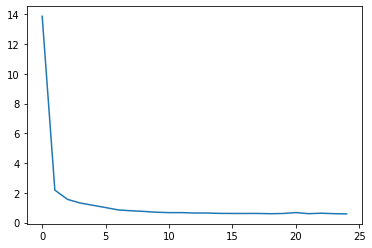

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(results)
plt.show()

In [102]:
preds = model_bilstm_lstm.predict(val_tokens)

In [103]:
sentence = preds

In [107]:
sentence

array([[0.        , 0.01331488, 0.00953303, 0.        , 0.03270476,
        0.        , 0.        , 0.01306853, 0.00791787, 0.        ],
       [0.        , 0.01749028, 0.0086022 , 0.        , 0.05761292,
        0.        , 0.        , 0.01461977, 0.00529721, 0.        ],
       [0.        , 0.02111945, 0.00787946, 0.        , 0.0810889 ,
        0.        , 0.        , 0.01504137, 0.0033768 , 0.        ],
       [0.        , 0.02296096, 0.00808537, 0.        , 0.10210739,
        0.        , 0.        , 0.01270035, 0.00162332, 0.        ],
       [0.        , 0.02324302, 0.00870282, 0.        , 0.12087548,
        0.        , 0.        , 0.00917917, 0.00129185, 0.        ],
       [0.        , 0.02225252, 0.00855732, 0.        , 0.14142625,
        0.        , 0.        , 0.00700291, 0.        , 0.        ],
       [0.        , 0.01901719, 0.00608868, 0.        , 0.16032508,
        0.        , 0.        , 0.00649167, 0.        , 0.        ],
       [0.        , 0.01280705, 0.0021119

In [80]:
# tensorflow.linalg.matmul(sentence,tensorflow.linalg.pinv(weights))

In [49]:
words_embeddings = {w:weights[idx] for w, idx in token2idx.items()}

In [51]:
words_embeddings

{'कुल्लू': <tf.Tensor: shape=(64,), dtype=float32, numpy=
 array([-0.03804575,  0.00147411, -0.02354754, -0.00958642,  0.0435524 ,
         0.04486893,  0.0115275 , -0.02544979,  0.0608614 ,  0.0127323 ,
         0.04139624,  0.01775032,  0.03205844, -0.01604194, -0.00505917,
         0.00787073,  0.01004255, -0.0366542 , -0.00953695, -0.03919256,
         0.0444161 , -0.03481798, -0.01295215, -0.03607663,  0.03257598,
         0.00836755,  0.03796437,  0.01467737,  0.02269111,  0.0070155 ,
        -0.03164217,  0.03727053, -0.0135927 ,  0.01973725, -0.01813121,
         0.03132841,  0.01337139, -0.0098139 ,  0.02845058, -0.02569618,
         0.03682004,  0.0318874 , -0.02135131,  0.04213957, -0.04564234,
         0.05029076,  0.02304979, -0.01263778,  0.04041639,  0.03675678,
        -0.02751319,  0.00564083, -0.06065347,  0.03605438,  0.02048442,
         0.02607008,  0.01536482,  0.00421159, -0.05176299,  0.04173493,
         0.03444618, -0.04230677, -0.02431864,  0.01970452], dtype

In [59]:
tag_embeddings = {t:weights[idx] for t, idx in tag2idx.items()}
tag_embeddings

{'B-weather_type': <tf.Tensor: shape=(64,), dtype=float32, numpy=
 array([-0.03804575,  0.00147411, -0.02354754, -0.00958642,  0.0435524 ,
         0.04486893,  0.0115275 , -0.02544979,  0.0608614 ,  0.0127323 ,
         0.04139624,  0.01775032,  0.03205844, -0.01604194, -0.00505917,
         0.00787073,  0.01004255, -0.0366542 , -0.00953695, -0.03919256,
         0.0444161 , -0.03481798, -0.01295215, -0.03607663,  0.03257598,
         0.00836755,  0.03796437,  0.01467737,  0.02269111,  0.0070155 ,
        -0.03164217,  0.03727053, -0.0135927 ,  0.01973725, -0.01813121,
         0.03132841,  0.01337139, -0.0098139 ,  0.02845058, -0.02569618,
         0.03682004,  0.0318874 , -0.02135131,  0.04213957, -0.04564234,
         0.05029076,  0.02304979, -0.01263778,  0.04041639,  0.03675678,
        -0.02751319,  0.00564083, -0.06065347,  0.03605438,  0.02048442,
         0.02607008,  0.01536482,  0.00421159, -0.05176299,  0.04173493,
         0.03444618, -0.04230677, -0.02431864,  0.01970452

In [81]:
# tensorflow.linalg.matmul(tag_embeddings,tensorflow.linalg.pinv(weights))
# type(tag_embeddings['B-weather_type'])
print(tag_embeddings['B-weather_type'].shape)
print(weights.shape)
print(tensorflow.linalg.pinv(weights).numpy().shape)

(64,)
(282, 64)
(64, 282)


In [91]:
for t,vec in words_embeddings.items():
    t1 = tensorflow.nn.softmax((tensorflow.linalg.matmul(vec.numpy().reshape(vec.shape[0],1).T,tensorflow.linalg.pinv(weights).numpy())))
    t1 = t1.numpy()
    ind = np.unravel_index(np.argmax(t1, axis=None), t1.shape)
    print(t, ind[1], idx2token[ind[1]])

कुल्लू 0 कुल्लू
गीला 1 गीला
नगर 2 नगर
सुरक्षित 3 सुरक्षित
मुझे 4 मुझे
लंदन 5 लंदन
पठानकोट 6 पठानकोट
बाली 7 बाली
चेन्नई 8 चेन्नई
रात 9 रात
हूं 10 हूं
रहने 11 रहने
कितने 12 कितने
खजियार 13 खजियार
आसार 14 आसार
जोर 15 जोर
भारत 16 भारत
जयपुर 17 जयपुर
शहर 18 शहर
चाहिए 19 चाहिए
बाद 20 बाद
भर 21 भर
पड़ेगी 22 पड़ेगी
लेने 23 लेने
कोलकाता 24 कोलकाता
बताओ 25 बताओ
डिग्री 26 डिग्री
टोपी 27 टोपी
हुए 28 हुए
ऋषिकेश 29 ऋषिकेश
कौनसी 30 कौनसी
वेअथेर 31 वेअथेर
ऑक्सफोर्ड 32 ऑक्सफोर्ड
लाहौर 33 लाहौर
गंगटोक 34 गंगटोक
कितना 35 कितना
या 36 या
रहेगी 37 रहेगी
लग 38 लग
कसोल 39 कसोल
अपेक्षाकृत 40 अपेक्षाकृत
मॉरीशस 41 मॉरीशस
लगता 42 लगता
साथ 43 साथ
तरीके 44 तरीके
होती 45 होती
पहले 46 पहले
सोमवार 47 सोमवार
कुछ 48 कुछ
बाहर 49 बाहर
गरम 50 गरम
सुबह 51 सुबह
जोरदार 52 जोरदार
महीने 53 महीने
बढ़ेगा 54 बढ़ेगा
हम 55 हम
नवंबर 56 नवंबर
होगा 57 होगा
आगमन 58 आगमन
वास्तव 59 वास्तव
अप्रैल 60 अप्रैल
लेनी 61 लेनी
धूप 62 धूप
चलती 63 चलती
ठंडी 64 ठंडी
आज 65 आज
हिमाचल 66 हिमाचल
दीव 67 दीव
खबर 68 खबर
ले 69 ले
वर्ष 70 वर्ष
में 71 में
मसूरी 72

In [92]:
for t,vec in tag_embeddings.items():
    t1 = tensorflow.nn.softmax((tensorflow.linalg.matmul(vec.numpy().reshape(vec.shape[0],1).T,tensorflow.linalg.pinv(weights).numpy())))
    t1 = t1.numpy()
    ind = np.unravel_index(np.argmax(t1, axis=None), t1.shape)
    print(t, ind[1], idx2tag[ind[1]])

B-weather_type 0 B-weather_type
U-weather_type 1 U-weather_type
U-date 2 U-date
L-date 3 L-date
O 4 O
B-location 5 B-location
L-location 6 L-location
U-location 7 U-location
B-date 8 B-date
L-weather_type 9 L-weather_type


In [109]:
for sentence in preds:
    for t in sentence:
        ind = np.unravel_index(np.argmax(t, axis=None), t.shape)
        print(idx2tag[ind[0]])

O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O
O


In [108]:
idx2tag

{0: 'B-weather_type',
 1: 'U-weather_type',
 2: 'U-date',
 3: 'L-date',
 4: 'O',
 5: 'B-location',
 6: 'L-location',
 7: 'U-location',
 8: 'B-date',
 9: 'L-weather_type'}